<a href="https://colab.research.google.com/github/anthonylhy/Data-Project---Stock-Market-Data-Analysis/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('TSLA', data_source='yahoo',start='2012-01-01', end='2021-04-20')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-04-14,780.789978,728.030029,770.700012,732.229980,49017400.0,732.229980
2021-04-15,743.690002,721.309998,743.099976,738.849976,27848900.0,738.849976
2021-04-16,749.409973,724.599976,728.650024,739.780029,27924000.0,739.780029


In [ ]:
#Get the rows and columns in the data set
df.shape

(2339, 6)

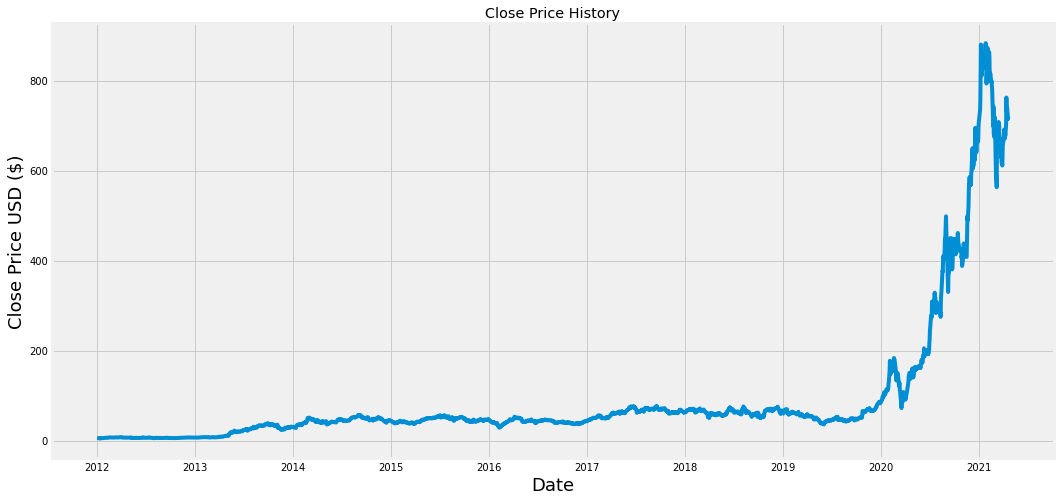

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1872

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00120428],
       [0.00112005],
       [0.00098573],
       ...,
       [0.83687561],
       [0.80824829],
       [0.81321109]])

In [ ]:
#Create the training data set
#Create the scaled traiing data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00120428, 0.00112005, 0.00098573, 0.00093793, 0.00101533,
       0.00109956, 0.00123843, 0.00124298, 0.        , 0.00086736,
       0.00091516, 0.00090378, 0.00086736, 0.00090606, 0.00105403,
       0.00117924, 0.00140006, 0.00148885, 0.00154348, 0.00142966,
       0.00154576, 0.00169829, 0.00190317, 0.00205115, 0.00200562,
       0.00208074, 0.00222872, 0.00189179, 0.00198058, 0.00236303,
       0.00246092, 0.00259296, 0.00277281, 0.00266581, 0.00260207,
       0.00267264, 0.00249507, 0.00246548, 0.00250873, 0.00241767,
       0.00264532, 0.00256109, 0.00249962, 0.00234937, 0.00235165,
       0.00234027, 0.00272045, 0.00300957, 0.00302778, 0.00284566,
       0.00277964, 0.00285249, 0.00277508, 0.00277053, 0.00281378,
       0.00264305, 0.0025702 , 0.003326  , 0.00344893, 0.00342845])]
[0.0033100671390087323]

[array([0.00120428, 0.00112005, 0.00098573, 0.00093793, 0.00101533,
       0.00109956, 0.00123843, 0.00124298, 0.        , 0.00086736,
       0.00091516, 0.00090378, 0.

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1812, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train,y_train,batch_size=1, epochs=1)


1812/1812 [==============================] - 41s 21ms/step - loss: 1.0399e-04


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from Index 1552 to 2012
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data into numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean ( predictions - y_test)**2 )
rmse

71.94458398267595

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


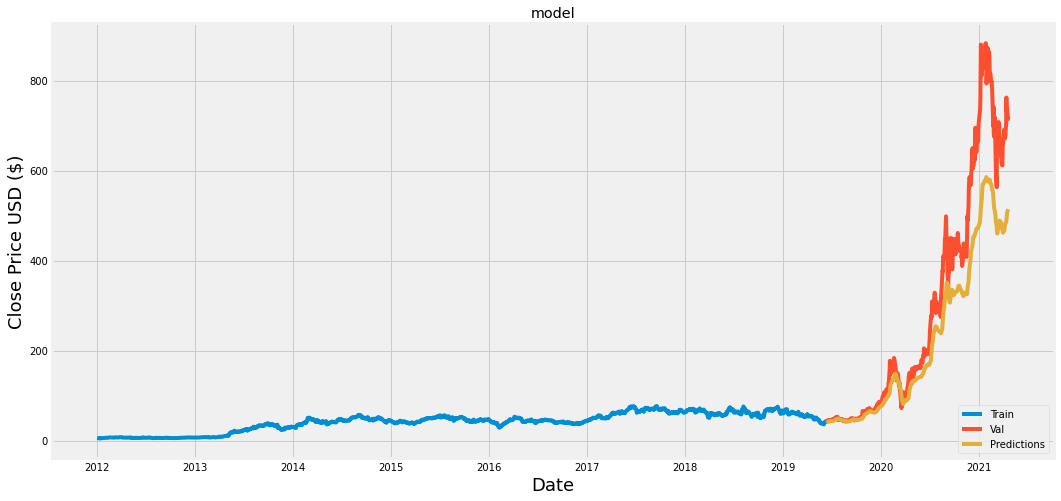

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-06-13,42.782001,40.026203
2019-06-14,42.984001,40.499748
2019-06-17,45.006001,40.907864
2019-06-18,44.948002,41.425213
2019-06-19,45.285999,41.939201
...,...,...
2021-04-14,732.229980,496.053986
2021-04-15,738.849976,502.564545
2021-04-16,739.780029,508.209717


In [ ]:
#Get the quote
tesla_quote = web.DataReader('TSLA', data_source = 'yahoo', start = '2012-01-01', end = '2020-04-17')
#Create a new dataframe
new_df = tesla_quote.filter(['Close'])
#Get the last 60 day closing price values and convert dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[118.104126]]


In [ ]:
tesla_quota2 = web.DataReader('TSLA', data_source='yahoo', start='2021-01-03', end='2021-04-20')
print(tesla_quota2['Close'])

Date
2021-01-04    729.770020
2021-01-05    735.109985
2021-01-06    755.979980
2021-01-07    816.039978
2021-01-08    880.020020
                 ...    
2021-04-14    732.229980
2021-04-15    738.849976
2021-04-16    739.780029
2021-04-19    714.630005
2021-04-20    718.989990
Name: Close, Length: 74, dtype: float64
